# Simulating a Rocket Launch

## Defining Rocket Parameters and Functions

In [472]:
import numpy as np

class rocket:
    
    delta_t = 1
    gravity = 9.81
    earth_radius = 6378137
    
    def __init__(self):
        
        self.fuel = 0    #kg 
        self.dry_mass = 1000 #kg 
        self.propellant_flow = 25 #kg/sec 
        self.exit_vel = 1e4 #m/s
        self.pos_x = [0] #m 
        self.pos_y = [6578137] #m
        self.angle = [np.pi/2] #radians
        self.vel_x = [8000] #m/s
        self.vel_y = [0] #m/s
        self.accel_x = [0] #m/s^2
        self.accel_y = [0] #m/s^2
        self.thrust = [0] #N
        self.time = [0] #sec
        self.horizontal = 1e5 #m
    
    def update_thrust(self):
        prop_mass = self.propellant_flow * self.delta_t
        
        if self.fuel <= 0:
            prop_mass = 0
            self.fuel = 0
        elif self.fuel <= prop_mass:
            prop_mass = self.fuel
            self.fuel = 0
        else:
            self.fuel -= prop_mass
        
        thrust = prop_mass * self.exit_vel / self.delta_t
        self.thrust.append(thrust)
    
    def update_acceleration(self):
        
        #6378137 m - radius of earth @ sea level
        thrust = self.thrust[-1]
        mass = self.dry_mass + self.fuel
        x = self.pos_x[-1]
        y = self.pos_y[-1]
        length = np.sqrt(x**2 + y**2)
        
        #angle of thrust
        angle = self.angle[-1]
        t_x = np.cos(angle) * thrust
        t_y = np.sin(angle) * thrust
        
        #angle of gravity
        g_angle = np.arctan2(y, x)
        g_x = np.cos(g_angle) * self.gravity
        g_y = np.sin(g_angle) * self.gravity
        
        if length < self.earth_radius:
            g_x = 0
            g_y = 0
            
        a_x = t_x/mass - g_x
        a_y = t_y/mass - g_y
#         print(a_x, -1*g_x)
        self.accel_x.append(a_x)
        self.accel_y.append(a_y)
    
    def update_velocity(self):
        a_x = self.accel_x[-1]
        a_y = self.accel_y[-1]
        v_x = self.vel_x[-1]
        v_y = self.vel_y[-1]
        delta_t = self.delta_t
        v_x += a_x * delta_t
        v_y += a_y * delta_t
        
        
        x = self.pos_x[-1]
        y = self.pos_y[-1]
        length = np.sqrt(x**2 + y**2)
        
        if length < self.earth_radius:
            v_x, v_y = 0, 0
        
        self.vel_x.append(v_x)
        self.vel_y.append(v_y)
    
    def update_position(self):
        v_x = self.vel_x[-1]
        v_y = self.vel_y[-1]
        p_x = self.pos_x[-1]
        p_y = self.pos_y[-1]
        delta_t = self.delta_t
        p_x += v_x * delta_t
        p_y += v_y * delta_t
        
        self.pos_x.append(p_x)
        self.pos_y.append(p_y)
        
    def update_angle(self):
        x = self.pos_x[-1]
        y = self.pos_y[-1]
        length = np.sqrt(x**2 + y**2)
        altitude = length - self.earth_radius
        
        if altitude > self.horizontal:
            angle = 0
        else:
            angle = np.pi/2 * np.cos(np.pi / 2 / self.horizontal * altitude)
        
        self.angle.append(angle)
        
    def update(self):
        
        self.update_thrust()
        self.update_acceleration()
        self.update_velocity()
        self.update_position()
        self.update_angle()
        time = self.time[-1] + self.delta_t
        self.time.append(time)

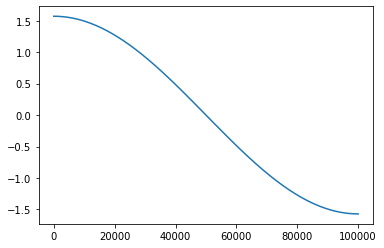

In [390]:
height = np.linspace(0,1e5,1e3)

angle = np.pi/2 * (np.cos(np.pi / 2 / 5e4 * height))

plt.plot(height, angle)
plt.show()

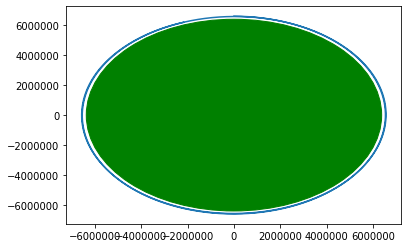

In [473]:
apollo = rocket()


for i in range(10000):
    apollo.update()
    
    
fig, ax = plt.subplots()
earth = plt.Circle((0, 0), 6378137, color='g')
ax.plot(apollo.pos_x, apollo.pos_y)
ax.add_patch(earth)
plt.show()

# plt.plot(apollo.time, apollo.thrust)
# plt.title("Thrust over Time")
# plt.show()

# plt.plot(apollo.time, apollo.accel_y)
# plt.title("Y acceleration over Time")
# plt.show()

# plt.plot(apollo.time, apollo.accel_x)
# plt.title("X acceleration over Time")
# plt.show()


# plt.plot(apollo.time, apollo.vel_y)
# plt.title("Y velocity over Time")
# plt.show()

# plt.plot(apollo.time, apollo.vel_x)
# plt.title("X velocity over Time")
# plt.show()


# plt.plot(apollo.time, apollo.angle)
# plt.title("Rocket Angle over Time")
# plt.show()



## Atmospheric Data
This data was obtained from [pdas.com](https://www.pdas.com/bigtables.html) and is a digital version of the tables found in *US Standard Atmosphere, 1976*. All of the data in `atmospheric_data.csv` are in SI units. The continuous equations representing the pressure and density data were created by fitting a polynomial of degree 4 to the natural log of the data. Both the degree of the polynomial and the range of the data being fit was modified to make sure the fitted equations were most accurate closer to sea level where the effects of pressure and density are not negligible.

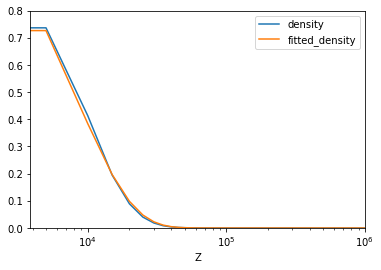

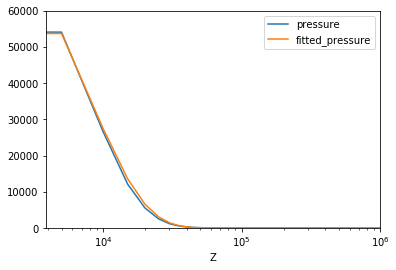

         Z        H     temp  temp_ratio  pressure  pressure_ratio  density  \
0      0.0      0.0  288.150      1.0000  101320.0         1.00000  1.22500   
1   5000.0   5000.0  255.676      0.8873   54048.0         0.53342  0.73643   
2  10000.0  10000.0  223.252      0.7748   26500.0         0.26153  0.41351   
3  15000.0  15000.0  216.650      0.7519   12112.0         0.11953  0.19476   
4  20000.0  19900.0  216.650      0.7519    5529.3         0.05457  0.08891   

   density_ratio       c       g  fitted_density  fitted_pressure  
0        1.00000  340.29  9.8066        1.323637    101816.330332  
1        0.60117  320.55  9.7912        0.726233     53674.459874  
2        0.33756  299.53  9.7759        0.384084     27364.196936  
3        0.15898  295.07  9.7605        0.196689     13557.092235  
4        0.07258  295.07  9.7452        0.097955      6557.537163  
             Z         H    temp  temp_ratio      pressure  pressure_ratio  \
196   980000.0  849100.0  1000.0      3

In [197]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import grama as gr
from scipy.optimize import curve_fit

#import atmospheric data
atmos = pd.read_csv("atmospheric_data.csv")

#model of atmospheric density
md_density = np.polyfit(atmos.Z[:63], np.log(atmos.density[:63]), 4)
atmos["fitted_density"] = np.exp(np.polyval(md_density, atmos.Z))
atmos.plot("Z", ["density", "fitted_density"], logx=True, xlim=(0,1e6), ylim=(0,.8))
plt.show()

#model of atmospheric pressure
md_pressure = np.polyfit(atmos.Z[:59], np.log(atmos.pressure[:59]), 4)
atmos["fitted_pressure"] = np.exp(np.polyval(md_pressure, atmos.Z))
atmos.plot("Z", ["pressure", "fitted_pressure"], logx=True, xlim=(0,1e6),ylim=(0,60000))
plt.show()


# print(atmos.head())
# print(atmos.tail())

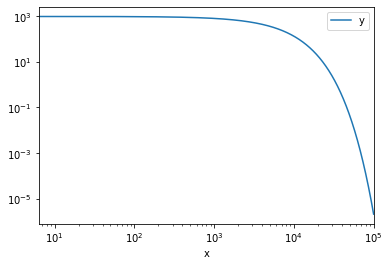

In [65]:
df = pd.DataFrame()
df["x"] = np.linspace(0,1e5, 1e4)
df["y"] = 1e3*np.exp(-x/5e3)

df.plot("x", "y", loglog=True)